# Analysis of the ouput of the field diagnostic stepper

In [43]:
import json
import matplotlib.pyplot as plt

## Data

In [44]:
# Read data from the file field-diagnostic-stepper.out.json

with open('field-diagnostic-stepper.out.json') as f:
    data = json.load(f)

# Build dictionary of field values
# Value in the index 1 from n-2 are the number of time that i operation was executed
# Value in the index n-1 is the number of time that n operation wasn't enough to reach the tolerance
iterations = {}
n = data['input']['field_options']['max_nsteps']
for i in range(1, n):
    iterations[i] = data['result']['field-diagnostic']['num_iter'][i]
iterations[n-1] += data['result']['field-diagnostic']['num_iter'][n]

print('Number of iterations: {}'.format(iterations))
print('Size of the dictionary: {}'.format(len(iterations)))

Number of iterations: {1: 2115131553, 2: 101908219, 3: 58292989, 4: 51267241, 5: 15544969, 6: 22064160, 7: 11094415, 8: 18014446, 9: 13171498, 10: 14850300, 11: 10197964, 12: 10774238, 13: 4195119, 14: 4142250, 15: 2316958, 16: 4572232, 17: 1682216, 18: 4438805, 19: 1424789, 20: 3323978, 21: 2718669, 22: 1638051, 23: 1021944, 24: 4666955, 25: 1788144, 26: 1526968, 27: 3260334, 28: 2695172, 29: 1133757, 30: 2816107, 31: 697551, 32: 2093845, 33: 1167990, 34: 459381, 35: 1204049, 36: 2196334, 37: 380056, 38: 382576, 39: 406909, 40: 2215945, 41: 374866, 42: 966334, 43: 336813, 44: 891087, 45: 1135431, 46: 321918, 47: 309641, 48: 1104781, 49: 519877, 50: 912851, 51: 254989, 52: 284436, 53: 240888, 54: 805232, 55: 618404, 56: 768312, 57: 232002, 58: 207259, 59: 197541, 60: 787115, 61: 190738, 62: 215282, 63: 649452, 64: 415194, 65: 196877, 66: 448817, 67: 151368, 68: 185222, 69: 165240, 70: 527668, 71: 151502, 72: 655002, 73: 138435, 74: 132615, 75: 142398, 76: 125475, 77: 354353, 78: 167600

## Analysis

In [45]:
class StatObject:
    name = ''
    value = -1
    index = -1

    def __init__(self, name):
        self.name = name

    def set_by_index(self, index, data):
        self.index = index
        self.value = data[index]
        return self

    def set_by_value(self, value):
        self.value = value
        self.index = -1
        return self
    
    def __str__(self):
        return '{} at index {} with {} iterations'.format(self.name, self.index, self.value)

In [46]:
# Get important information from the data
most_iterations = StatObject('Most').set_by_index(max(iterations, key=iterations.get), iterations)
least_iterations = StatObject('Least').set_by_index(min(iterations, key=iterations.get), iterations)
average_iterations = StatObject('Average').set_by_value(sum(iterations.values())/len(iterations))
first_quartile_iterations = StatObject('First quartile').set_by_value(sorted(iterations.values())[len(iterations)//4])
median_iterations = StatObject('Median').set_by_value(sorted(iterations.values())[len(iterations)//2])
third_quartile_iterations = StatObject('Third quartile').set_by_value(sorted(iterations.values())[len(iterations)//4*3])
deviation_iterations = StatObject('Deviation').set_by_value(sum([(x-average_iterations.value)**2 for x in iterations.values()])/len(iterations))
typical_iterations = StatObject('Typical').set_by_value(sorted(iterations.values())[len(iterations)//4*3+1])

In [47]:
# Print information
print(most_iterations)
print(least_iterations)
print(average_iterations)
print(first_quartile_iterations)
print(median_iterations)
print(third_quartile_iterations)
print(deviation_iterations)
print(typical_iterations)

Most at index 1 with 2115131553 iterations
Least at index 94 with 53246 iterations
Average at index -1 with 25481169.464646466 iterations
First quartile at index -1 with 190738 iterations
Median at index -1 with 459381 iterations
Third quartile at index -1 with 1788144 iterations
Deviation at index -1 with 4.4726213119434936e+16 iterations
Typical at index -1 with 2093845 iterations


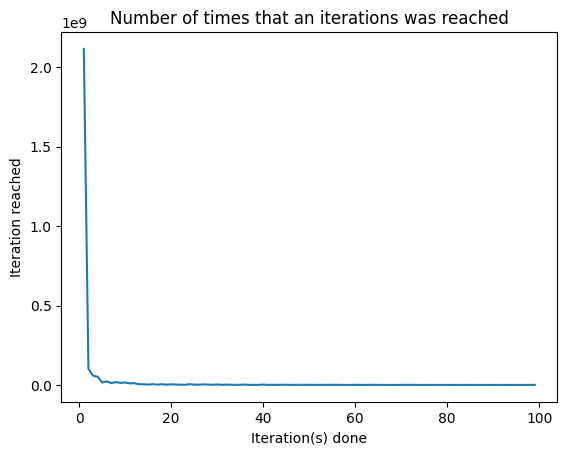

In [48]:
# Plot the data
plt.plot(iterations.keys(), iterations.values())
plt.xlabel('Iteration(s) done')
plt.ylabel('Iteration reached')
plt.title('Number of times that an iterations was reached')
plt.show()

In [49]:
# Compute the chance to hit the iteration
chance = {}
total = sum(iterations.values())
for i in range(1, n):
    chance[i] = iterations[i]/total

([<matplotlib.patches.Wedge at 0x19ffa356c10>,
 [Text(-0.9613638009834644, 0.5345836156847926, '1 iteration: 83.8%'),
  Text(0.6940038672791652, -0.8534392961432952, '2 iterations: 4.0%'),
  Text(0.8493786762553142, -0.6989677133621912, '3 iterations: 2.3%'),
  Text(0.9365576964486955, -0.5769399286084413, '4 iterations: 2.0%'),
  Text(0.9812667205589933, -0.49710725515063536, '5 iterations: 0.6%'),
  Text(1.003465089818256, -0.4506193665567864, ''),
  Text(1.0212124116474677, -0.4088095036776459, ''),
  Text(1.0353580037232855, -0.3715290084584693, ''),
  Text(1.049002977741918, -0.3310479613116343, ''),
  Text(1.0599146163963602, -0.2942465054157086, ''),
  Text(1.0685762469995608, -0.26104559821673684, ''),
  Text(1.0750290087895202, -0.23305070319787005, ''),
  Text(1.079186548903872, -0.21297040326052658, ''),
  Text(1.0813396167832865, -0.2017538925894006, ''),
  Text(1.082927532286901, -0.1930491124429307, ''),
  Text(1.0845439265735888, -0.18375111246559173, ''),
  Text(1.08594

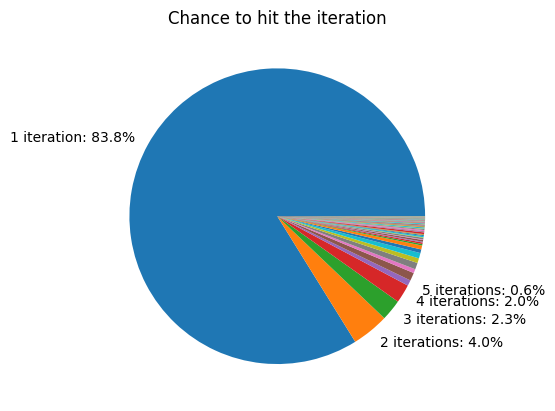

In [58]:
# Show a pie chart
# plt.pie(chance.values(), labels=chance.keys(), autopct='%1.1f%%')
# With just the percent and the label for the most common
labels = []
for k, v in chance.items():
    if k == 1:
        labels.append('{} iteration: {:.1f}%'.format(k, v*100))
    elif k <= 5:
        labels.append('{} iterations: {:.1f}%'.format(k, v*100))
    else:
        labels.append('')
plt.title('Chance to hit the iteration')
plt.pie(chance.values(), labels=labels)

C:\Users\Simon\AppData\Local\Temp\ipykernel_46356\1657390214.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


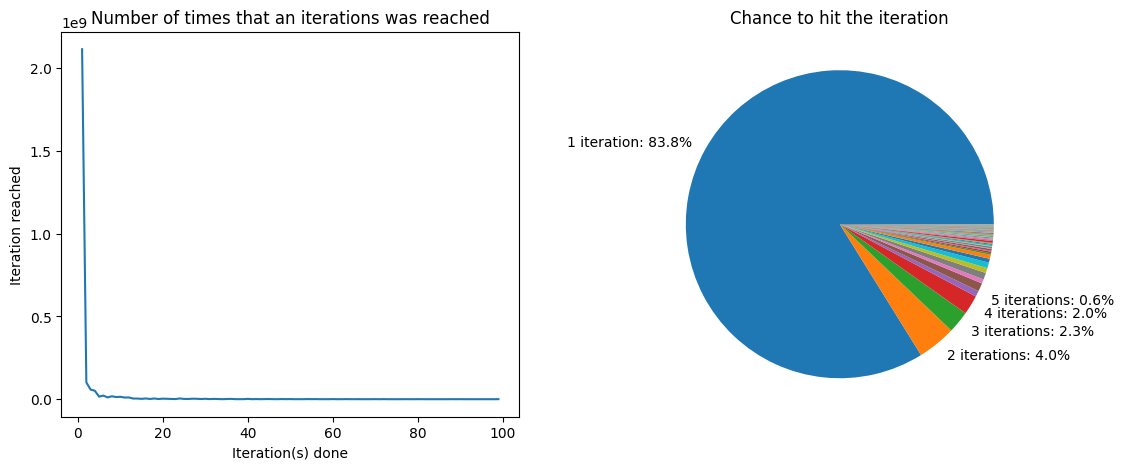

In [75]:
# Combine the two plots as subplots
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(121)
ax1.plot(iterations.keys(), iterations.values())
ax1.set_xlabel('Iteration(s) done')
ax1.set_ylabel('Iteration reached')
ax1.set_title('Number of times that an iterations was reached')

ax2 = fig.add_subplot(122)
ax2.pie(chance.values(), labels=labels)
ax2.set_title('Chance to hit the iteration')
fig.show()

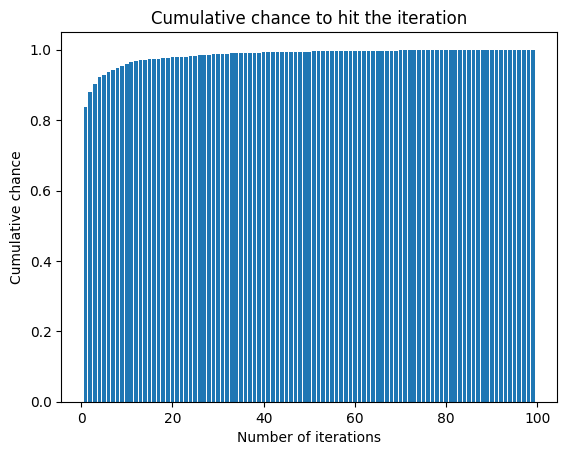

In [51]:
# Show cumulative chance
cumulative_chance = {}
cumulative_chance[1] = chance[1]
for i in range(2, n):
    cumulative_chance[i] = cumulative_chance[i-1] + chance[i]

# Show a bar chart
plt.bar(cumulative_chance.keys(), cumulative_chance.values())
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative chance')
plt.title('Cumulative chance to hit the iteration')
plt.show()

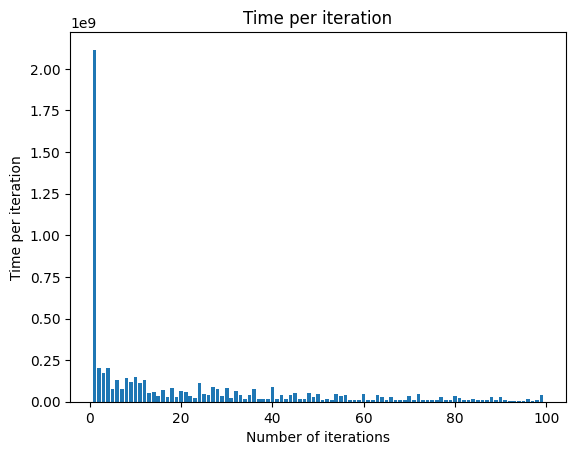

In [52]:
# Show time per iteration
time_per_iteration = {}
for i in range(1, n):
    time_per_iteration[i] = iterations[i] * i

# Show a bar chart
plt.bar(time_per_iteration.keys(), time_per_iteration.values())
plt.xlabel('Number of iterations')
plt.ylabel('Time per iteration')
plt.title('Time per iteration')
plt.show()

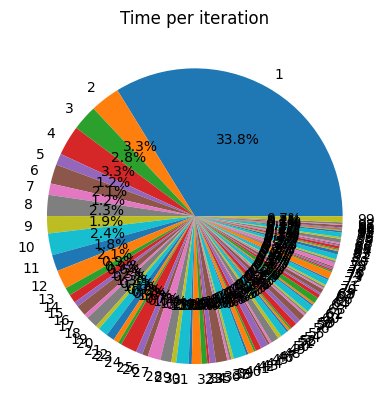

In [53]:
# Show pie chart of time per iteration
plt.pie(time_per_iteration.values(), labels=time_per_iteration.keys(), autopct='%1.1f%%')
plt.title('Time per iteration')
plt.show()


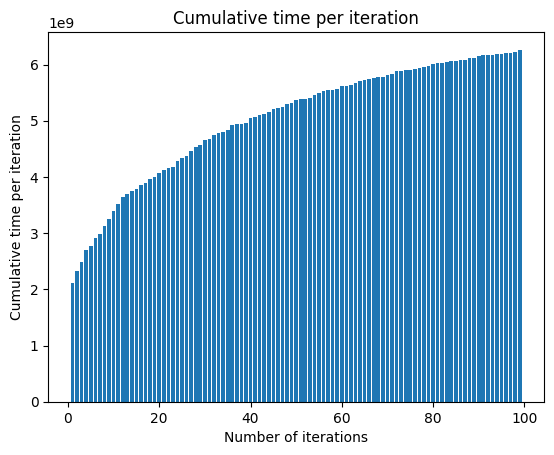

In [54]:
# Show cumulative time per iteration
cumulative_time_per_iteration = {}
cumulative_time_per_iteration[1] = time_per_iteration[1]
for i in range(2, n):
    cumulative_time_per_iteration[i] = cumulative_time_per_iteration[i-1] + time_per_iteration[i]

# Show a bar chart
plt.bar(cumulative_time_per_iteration.keys(), cumulative_time_per_iteration.values())
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative time per iteration')
plt.title('Cumulative time per iteration')
plt.show()

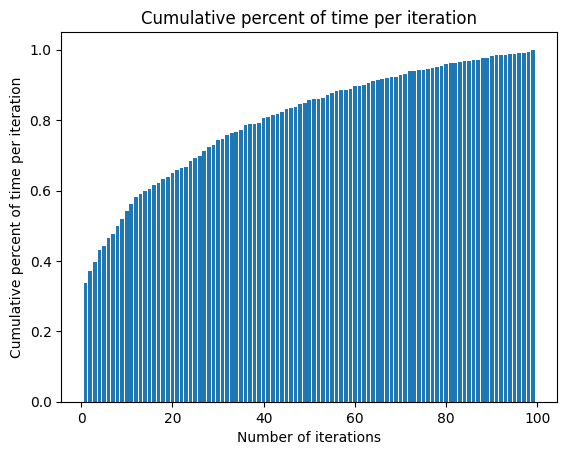

In [55]:
# Show the cumulative percent of time per iteration
cumulative_percent_time_per_iteration = {}
for i in range(1, n):
    cumulative_percent_time_per_iteration[i] = cumulative_time_per_iteration[i]/cumulative_time_per_iteration[n-1]

# Show a bar chart
plt.bar(cumulative_percent_time_per_iteration.keys(), cumulative_percent_time_per_iteration.values())
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative percent of time per iteration')
plt.title('Cumulative percent of time per iteration')
plt.show()

## Conlcusions

Following the 80/20 rule, we choose the number of iterations that covers 80% of the chance of time spent.

Iteration 40 covers 80% of the time


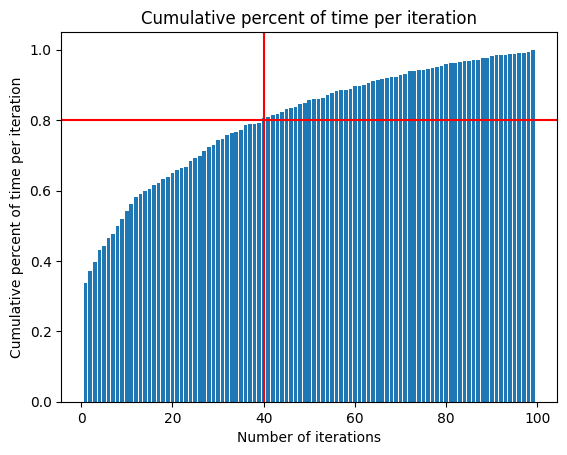

In [56]:
# Get the iteration that covers 80% of the time
stop_iteration = 1
for v in cumulative_percent_time_per_iteration.values():
    if v >= 0.8:
        print('Iteration {} covers 80% of the time'.format(stop_iteration))
        break
    stop_iteration += 1

# Show the cumulative percent of time per iteration
plt.bar(cumulative_percent_time_per_iteration.keys(), cumulative_percent_time_per_iteration.values())
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative percent of time per iteration')
plt.title('Cumulative percent of time per iteration')
plt.axvline(x=stop_iteration, color='r')
plt.axhline(y=0.8, color='r')
plt.show()